# Et kredsløb der kan identificere og rette op til en enkelt phase-flip-fejl

1) Det er en fordel at læse notebook'en for bitflip-fejlretning før denne. Ligesom for fejlretningskredsløbet for korrigering af bitflip-fejl får vi brug for fem qubits og to bits i kredsløbet her. Bemærk igen: alle qubits skal starte i tilstanden $\ket{0}$, for at fejlretningskredsløbet vil virke. Det gælder dog ikke q<sub>0</sub>, som er den qubit, vi koder.

In [7]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(5, 2)

2) Lav kodningen af q<sub>0</sub>. For at rette phase-flip-fejl udnytter vi, at en phase-flip-fejl for en $\ket{\pm}$-tilstand, hvor $\ket{\pm} = \frac{1}{\sqrt{2}}(\ket{0} \pm \ket{1})$, "svarer til" en bitflip-fejl. Med det menes der, at $Z \ket{\pm} = \ket{\mp}$. Idéen er, at vi koder vores fejlretningsqubits som $\alpha \ket{000} + \beta \ket{111}$ som før. Men så transformerer vi til tilstanden $\alpha \ket{+++} + \beta \ket{---}$ vha. H-gates.

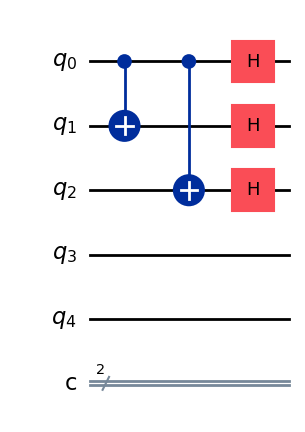

In [8]:
qc.cx(0, 1)
qc.cx(0, 2)
qc.h(range(3))
qc.draw("mpl")

3) Introducér en tilfældig phase-flip-fejl hos en af de tre qubits i repetitionskoden. Hvis fejlen f.eks. sker hos q<sub>0</sub>, så vil den resulterende tilstand for de tre første qubits blive $\alpha \ket{++-} + \beta \ket{--+}$.

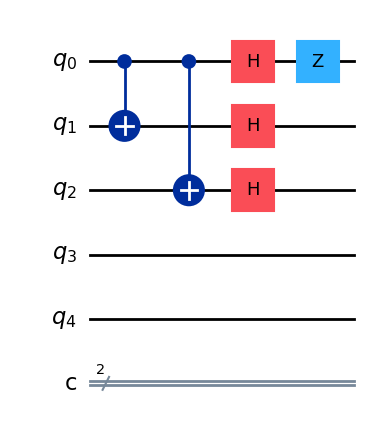

In [9]:
from random import randint
r = randint(0, 2)
qc.barrier()
qc.z(r)
qc.draw("mpl", plot_barriers = 0)

4) Brug en H-gate på hver fejlretningsqubit igen. Hvis vi f.eks. har tilstanden $\alpha \ket{++-} + \beta \ket{--+}$, lige efter at phase-flip-fejlen er indtruffet, så vil vi få tilstanden $\alpha \ket{001} + \beta \ket{110}$. Bemærk at phase-flip-fejlen viser sig som en bitflip-fejl, som vi godt ved, hvordan vi skal diagnosticere.

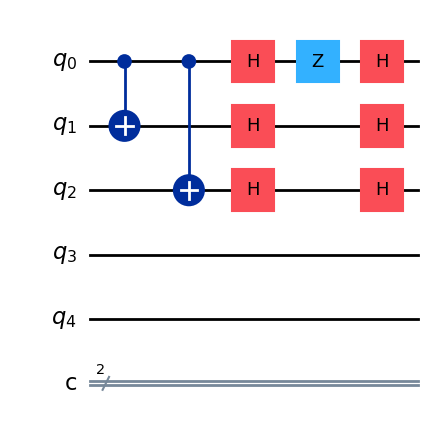

In [10]:
qc.barrier()
qc.h(range(3))
qc.draw("mpl", plot_barriers = 0)

5) Vi identificerer nu hos hvilken qubit, der er sket en phase-flip-fejl. Proceduren er den samme som for identificeringen af bitflip-fejl. For at gentage: phase-flip-fejlen er blevet "lavet om" til en bitflip-fejl.

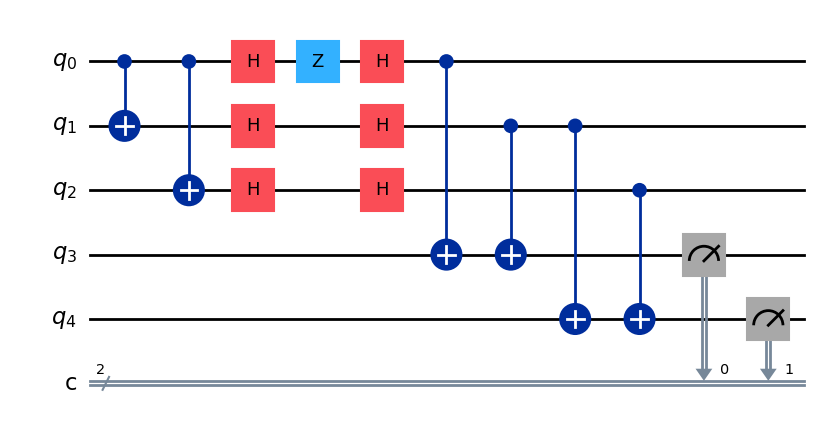

In [11]:
qc.cx(0, 3)
qc.cx(1, 3)
qc.cx(1, 4)
qc.cx(2, 4)
qc.barrier()
qc.measure(3, 0)
qc.measure(4, 1)
qc.draw("mpl", plot_barriers = 0)

6) Vi simulerer nu kredsløbet og retter fejlen på samme måde som for bitflip-fejlretningen.

Fejlsyndrom: 01


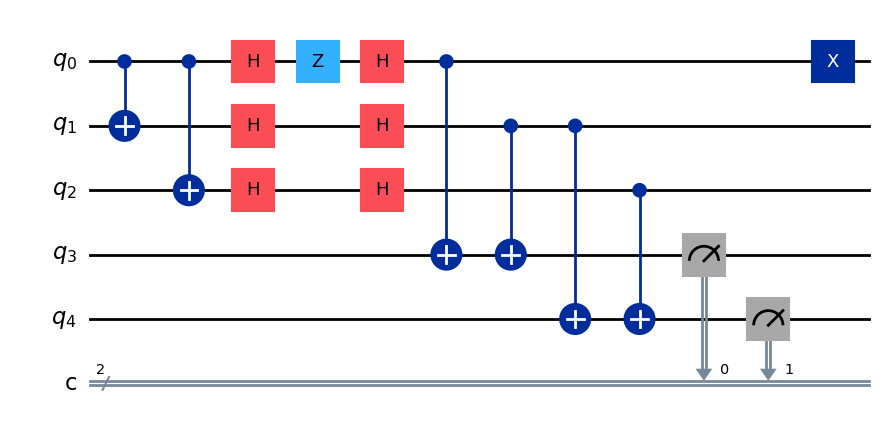

In [12]:
from qiskit.quantum_info import Pauli
from qiskit_aer.primitives import Estimator

estimator = Estimator()
job = estimator.run(2 * [qc], [Pauli("ZIIII"), Pauli("IZIII")], shots = 1)
syndrome = str(int(1 - job.result().values[0] / 2)) + str(int(1 - job.result().values[1] / 2))

print("Fejlsyndrom:", syndrome)

qc.barrier()
if syndrome == "01":
    qc.x(0)
elif syndrome == "11":
    qc.x(1)
elif syndrome == "10":
    qc.x(2)

qc.draw("mpl", plot_barriers = 0)

# Phase-flip-fejlen er nu blevet identificeret og rettet på forsvarlig vis!